In [746]:
import pandas as pd
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Merging Datasets

In [747]:
# First, we need to merge the two datasets, us_state_vaccinations.csv and  us-states.csv with “date” and “state”/“location”. (outer)
def merge_data(covid_data, vaccination_data):
    '''
    '''
    covid = pd.read_csv(covid_data)
    vaccination = pd.read_csv(vaccination_data)
    vaccination.loc[vaccination['location'] == 'New York State', 'location'] = 'New York'
    df = pd.merge(covid, vaccination,  how='outer', left_on=['date','state'], right_on = ['date','location'])
    return df

dataframe = merge_data('us-states.csv', 'us_state_vaccinations.csv')
dataframe.head()

,date,state,fips,cases,deaths,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2020-01-21,Washington,53.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,Washington,53.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,Washington,53.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,Illinois,17.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,Washington,53.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Research Question 1 Data Processing
1. find columns of interests

2. drop na

3. filter out only “Washington” state and “New York” state

4. select the rows from over the timespan of January 2021 to November 2021 

In [748]:
def data_1(merge_data):
    '''
    '''
    df = merge_data[['date', 'state', 'cases', 'deaths', 'total_vaccinations']]
    #df = df.dropna()
    is_wa = df['state'] == 'Washington'
    #is_wa = df['state'] == 'California'
    is_ny = df['state'] == 'New York'
    is_jan_2021 = df['date'] >= '2021-01-01'
    is_Nov_2021 = df['date'] <= '2021-11-30'
    
    df_wa = df[is_wa & is_jan_2021 & is_Nov_2021]
    df_wa[['cases', 'deaths']] = df_wa[['cases','deaths']].diff()
    df_wa.loc[~(df_wa['deaths'] > 0), 'deaths']=0
    df_ny = df[is_ny & is_jan_2021 & is_Nov_2021]
    df_ny[['cases', 'deaths']] = df_ny[['cases','deaths']].diff()
    df_ny.loc[~(df_ny['deaths'] > 0), 'deaths']=0
    return df_wa, df_ny

In [778]:
df_wa, df_ny = data_1(dataframe)
df_ny
#df_wa

/var/folders/mz/4l57lx951mjf18yq_806wqs40000gn/T/ipykernel_71079/2173024008.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mz/4l57lx951mjf18yq_806wqs40000gn/T/ipykernel_71079/2173024008.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,state,cases,deaths,total_vaccinations
16767,2021-01-01,New York,NaN,0.0,NaN
16822,2021-01-02,New York,15849.0,121.0,NaN
16877,2021-01-03,New York,12232.0,147.0,NaN
16932,2021-01-04,New York,11242.0,166.0,NaN
16987,2021-01-05,New York,13142.0,148.0,NaN
...,...,...,...,...,...
34928,2021-11-26,New York,8200.0,21.0,NaN
34984,2021-11-27,New York,3247.0,56.0,NaN
35040,2021-11-28,New York,4506.0,27.0,NaN
35096,2021-11-29,New York,8156.0,49.0,29854124.0


In [750]:
#fig, [ax1, ax2] = plt.subplots(2)
#df_ny.plot(x='date', y='total_vaccinations', ax=ax1)
#df_ny.plot(x='date', y='cases', ax=ax1)
#df_wa.plot(x='date', y='total_vaccinations', ax=ax2)
#df_wa.plot(x='date', y='cases', ax=ax2)

In [751]:
#df_ny.plot(x='date', y='cases')

# Research Question 2 Data Processing
1. timespan of 1st November, 2021 to 15th December, 2021

2. whole country 
    
3. cases and deathes (state: grouby data, sum: cases and deathes, this is a series)


In [752]:
def data_2(merge_data):
    df = merge_data[['date', 'state', 'cases', 'deaths']]
    is_Nov_1_2021 = df['date'] >= '2021-10-31'
    is_Dec_15_2021 = df['date'] <= '2021-12-15'
    df = df[is_Nov_1_2021 & is_Dec_15_2021]
    df = df.groupby('date')['cases', 'deaths'].sum()
    df[['cases', 'deaths']] = df[['cases','deaths']].diff()
    df = df.dropna()
    df['date'] = df.index
    return df

data2 = data_2(dataframe)
data2.head()
#data2.iloc[:, 0]
#data2.keys()[0]

/var/folders/mz/4l57lx951mjf18yq_806wqs40000gn/T/ipykernel_71079/1129835070.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,cases,deaths,date
date,,,
2021-11-01,124570.0,1151.0,2021-11-01
2021-11-02,76943.0,1516.0,2021-11-02
2021-11-03,84844.0,1880.0,2021-11-03
2021-11-04,83087.0,1123.0,2021-11-04
2021-11-05,91768.0,2321.0,2021-11-05


In [753]:
#sns.barplot(x='date', y="deaths", data=data2)

In [754]:
#sns.barplot(x='date', y="cases", data=data2)

# Research Question 3 Data Processing
1. filter out washington state

2. trainning data: January 1st 2021 to January 1st 2022

3. test data: January 1st 2022 to June 1st 2022

4. features: ‘people__vaccinated_per_hundred',  “total_distributed_per_hundred”, and “daily_vaccinations”

5. label: the death column in the other dataset. 

In [779]:
def data3(merge_data):
    is_wa = merge_data['state'] == 'Washington'
    df = merge_data[is_wa]
    
    df = df[['date', 'people_vaccinated_per_hundred', 'distributed_per_hundred',
             'daily_vaccinations', 'deaths']]
    df['deaths'] = df['deaths'].diff()
    df.loc[~(df['deaths'] > 0), 'deaths']=0
    df = df.dropna()
    
    is_Jan_1_2021 = df['date'] >= '2021-01-01'
    is_Dec_31_2021 = df['date'] <= '2021-12-31'
    
    is_Jan_1_2022 = df['date'] >= '2022-01-01'
    is_Jun_1_2022 = df['date'] <= '2022-06-01'
    
    training_data = df[is_Jan_1_2021 & is_Dec_31_2021]
    testing_data = df[is_Jan_1_2022 & is_Jun_1_2022]
    
    training_features = training_data[['people_vaccinated_per_hundred',
                                      'distributed_per_hundred','daily_vaccinations']]
    training_label = training_data['deaths']
    
    testing_features = testing_data[['people_vaccinated_per_hundred',
                                     'distributed_per_hundred','daily_vaccinations']]
    testing_label = testing_data['deaths']
    return training_features, training_label, testing_features, testing_label

training_features, training_label, testing_features, testing_label = data3(dataframe)
training_features
#training_label
#testing_features
#testing_label

,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations
17445,2.23,7.52,12671.0
17500,2.46,8.61,14836.0
17555,2.64,9.14,15680.0
17775,3.49,9.14,17948.0
17830,3.76,10.57,19790.0
...,...,...,...
36458,75.20,198.05,42645.0
36682,75.36,197.27,37177.0
36738,75.51,197.27,31772.0
36794,75.57,198.50,27572.0


In [756]:
#sns.barplot(x='date', y='deaths', data=training_label)
#plt.locator_params(nbins=4)

# Research Question 1 Plot

How do the confirmed cases and deaths for Washington state and New York state change over time? 

Is there a correlation between the number of confirmed cases and the vaccinated population ? 

Is there a correlation between the number of deaths and the vaccinated population? 

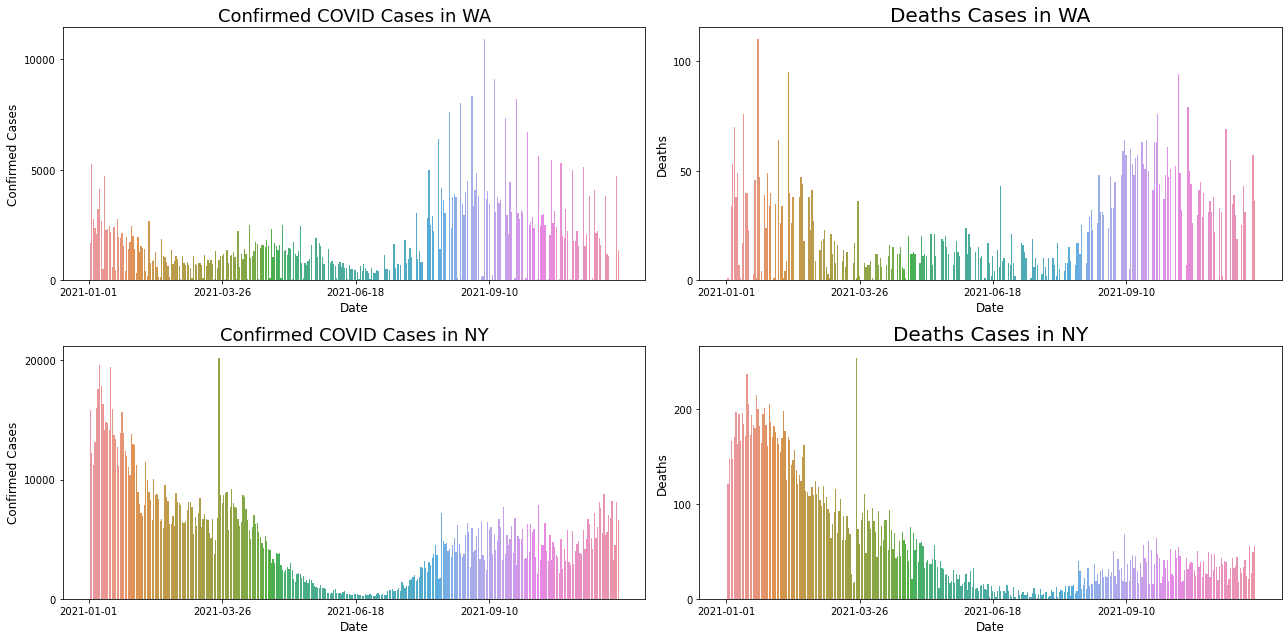

In [757]:
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(nrows=2, ncols=2, figsize=(18,9))
sns.barplot(x='date', y="cases", data=df_wa, ax=ax1)
sns.barplot(x='date', y="deaths", data=df_wa, ax=ax2)
sns.barplot(x='date', y="cases", data=df_ny, ax=ax3)
sns.barplot(x='date', y="deaths", data=df_ny, ax=ax4)

ax1.locator_params(nbins=4)
ax2.locator_params(nbins=4)
ax3.locator_params(nbins=4)
ax4.locator_params(nbins=4)

ax1.set_title('Confirmed COVID Cases in WA', fontsize = 18)
ax1.set_ylabel('Confirmed Cases', fontsize = 12)
ax1.set_xlabel('Date', fontsize = 12)

ax2.set_title('Deaths Cases in WA', fontsize = 20)
ax2.set_ylabel('Deaths', fontsize = 12)
ax2.set_xlabel('Date', fontsize = 12)

ax3.set_title('Confirmed COVID Cases in NY', fontsize = 18)
ax3.set_ylabel('Confirmed Cases', fontsize = 12)
ax3.set_xlabel('Date', fontsize = 12)

ax4.set_title('Deaths Cases in NY', fontsize = 20)
ax4.set_ylabel('Deaths', fontsize = 12)
ax4.set_xlabel('Date', fontsize = 12)

fig.tight_layout()

In [780]:
#correlation between the number of confirmed cases and the vaccinated population in WA
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=df_wa['date'],
                     y=df_wa['cases'],
                     name='daily COVID cases'),
                     secondary_y=True)

fig.add_trace(go.Scatter(x=df_wa['date'],
                         y=df_wa['total_vaccinations'],
                         name='Vaccinations',
                         mode="lines"),
                         secondary_y=False)

fig.update_xaxes(title_text='date')

# Set y-axes titles and plot title
fig.update_yaxes(title_text='Total Vaccinations', secondary_y=False)
fig.update_yaxes(title_text='COVID cases', secondary_y=True)
fig.update_layout(title={
    'text': "Vaccinations & COVID Cases Over Time in WA",
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    yaxis_title='Total Vaccination',
    xaxis_title='Time')
plot(fig)

'temp-plot.html'

In [759]:
# correlation between the number of deaths and the vaccinated population in WA
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=df_wa['date'],
                     y=df_wa['deaths'],
                     name='daily deaths'),
                     secondary_y=True)

fig.add_trace(go.Scatter(x=df_wa['date'],
                         y=df_wa['total_vaccinations'],
                         name='Vaccinations',
                         mode="lines"),
                         secondary_y=False)

fig.update_xaxes(title_text='date')

# Set y-axes titles and plot title
fig.update_yaxes(title_text='Total Vaccinations', secondary_y=False)
fig.update_yaxes(title_text='deaths', secondary_y=True)
fig.update_layout(title={
    'text': "Vaccinations & Deaths Over Time in WA",
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    yaxis_title='Total Vaccination',
    xaxis_title='Time')
plot(fig)

'temp-plot.html'

In [760]:
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [761]:
#correlation between the number of confirmed cases and the vaccinated population in NY
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=df_ny['date'],
                     y=df_ny['cases'],
                     name='daily COVID cases'),
                     secondary_y=True)

fig.add_trace(go.Scatter(x=df_ny['date'],
                         y=df_ny['total_vaccinations'],
                         name='Vaccinations',
                         mode="lines"),
                         secondary_y=False)

fig.update_xaxes(title_text='date')

# Set y-axes titles and plot title
fig.update_yaxes(title_text='Total Vaccinations', secondary_y=False)
fig.update_yaxes(title_text='COVID cases', secondary_y=True)
fig.update_layout(title={
    'text': "Vaccinations & COVID Cases Over Time in NY",
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    yaxis_title='Total Vaccination',
    xaxis_title='Time')
plot(fig)

'temp-plot.html'

In [762]:
# correlation between the number of deaths and the vaccinated population in NY
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=df_ny['date'],
                     y=df_ny['deaths'],
                     name='daily deaths'),
                     secondary_y=True)

fig.add_trace(go.Scatter(x=df_ny['date'],
                         y=df_ny['total_vaccinations'],
                         name='Vaccinations',
                         mode="lines"),
                         secondary_y=False)

fig.update_xaxes(title_text='date')

# Set y-axes titles and plot title
fig.update_yaxes(title_text='Total Vaccinations', secondary_y=False)
fig.update_yaxes(title_text='deaths', secondary_y=True)
fig.update_layout(title={
    'text': "Vaccinations & Deaths Over Time in NY",
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    yaxis_title='Total Vaccination',
    xaxis_title='Time')
plot(fig)

'temp-plot.html'

# Research Question 2 Plot

Were the confirmed and death cases in the US experiencing a surge after the end of travel restrictions between US and other countries on November 8th [1]?

In [763]:
#data2['date'] = pd.to_datetime(data2['date']).astype(int)/ 10000000000
#data2['date'] = data2['date'].astype('datetime64[ns]')
#data2

#rows, columns = data2.shape
#rows
#y = np.arange(1, rows+1)
#y

Mean Squared Error for CASES : 0.08309085307422492
Mean Squared Error for DEATHS : 0.00026453831221595614


Text(0.5, 0, 'Date')

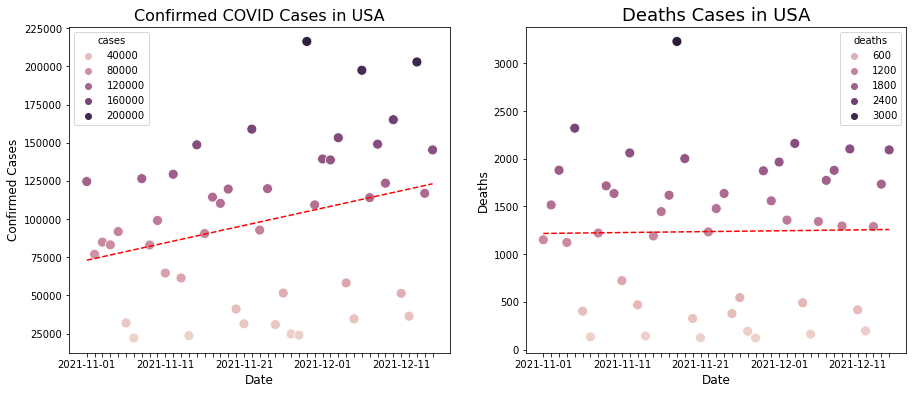

In [777]:
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(ncols=2, figsize=(15,6))
model = LinearRegression()

# Creating Best Fit Curve function
def objective(feature, coef, inter):
    return coef * feature + inter

# Defining the Feature. Converting date into consecutive integer from 1 to infinity.
rows, columns = data2.shape
x = np.arange(rows).reshape(-1, 1)

for i in [0,1]:
    # Ploting the data using a scatter plot
    sns.scatterplot(x=data2.keys()[2], y=data2.keys()[i], data=data2, ax=axs[i], s=100,
                    hue=data2.keys()[i])
    
    # Finding the labels
    y = data2[data2.keys()[i]]

    # Training the model
    model.fit(x, y)
    
    # calculate Mean Squared Error
    r_sq = model.score(x, y)
    print('Mean Squared Error for', data2.keys()[i].upper(), ':', str(r_sq))
    
    # Plot the Best Fit curve
    coef = model.coef_
    inter = model.intercept_
    y = objective(x, coef, inter)
    axs[i].plot(x, y, '--', color='red')

# Normalize the x axis
for ax in axs:
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

# Customize the axis and title
axs[0].set_title('Confirmed COVID Cases in USA', fontsize = 16)
axs[0].set_ylabel('Confirmed Cases', fontsize = 12)
axs[0].set_xlabel('Date', fontsize = 12)

axs[1].set_title('Deaths Cases in USA', fontsize = 18)
axs[1].set_ylabel('Deaths', fontsize = 12)
axs[1].set_xlabel('Date', fontsize = 12)

# Research Question 3 Analysis

Are data of current vaccination progress, vaccine distribution rate, and daily vaccination rate sufficient enough to make predictions on future deaths in Washington state?

In [765]:
# Import the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create an untrained model
model = DecisionTreeRegressor()

# Train it on our training data
model.fit(training_features, training_label)

# Calculate the mean squared error for the training dataset
training_predictions = model.predict(training_features)
training_error = mean_squared_error(training_label, training_predictions)
print('Training Error:', training_error)

## Calculate the mean squared error for the testing dataset
testing_predictions = model.predict(testing_features)
testing_error = mean_squared_error(testing_label, testing_predictions)
print('Testing Error:', testing_error)

Training Error: 0.0
Testing Error: 1290.8175182481752


# Research Question 2 Plot Method Two

0.9363636363635096


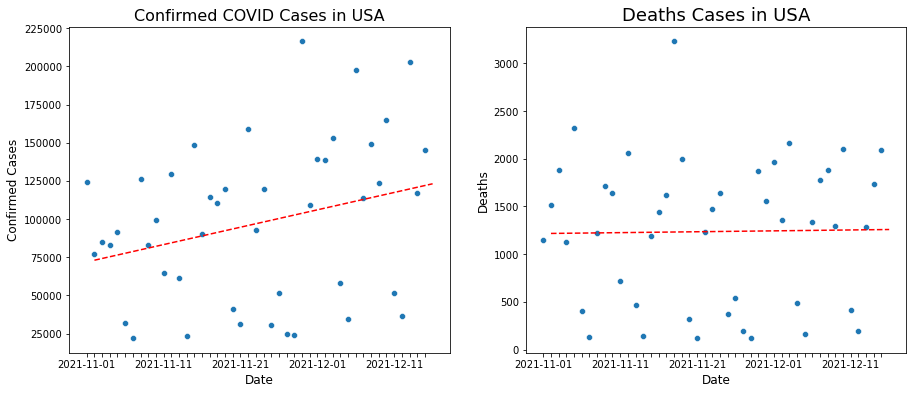

In [766]:
from scipy.optimize import curve_fit
import numpy as np

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(15,6))
sns.scatterplot(x='date', y="cases", data=data2, ax=ax1)
sns.scatterplot(x='date', y="deaths", data=data2, ax=ax2)

for ax in [ax1, ax2]:
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

ax1.set_title('Confirmed COVID Cases in USA', fontsize = 16)
ax1.set_ylabel('Confirmed Cases', fontsize = 12)
ax1.set_xlabel('Date', fontsize = 12)

ax2.set_title('Deaths Cases in USA', fontsize = 18)
ax2.set_ylabel('Deaths', fontsize = 12)
ax2.set_xlabel('Date', fontsize = 12)


def objective(x, a, b):
    return a * x + b
#curve fit
y = data2['cases'].apply(int)
rows, columns = data2.shape
x = np.arange(1, rows+1)
popt, _ = curve_fit(objective, x, y) 
# summarize the parameter values
a, b = popt
# define a sequence of inputs between the smallest and largest known inputs
x_line = x
# calculate the output for the range
y_case_line = objective(x_line, a, b)

#curve fit
y = data2['deaths'].apply(int)
popt, _ = curve_fit(objective, x, y) 
# summarize the parameter values
a, b = popt
print(a)
# calculate the output for the range
y_death_line = objective(x_line, a, b)

# create a line plot for the mapping function
ax1.plot(x_line, y_case_line, '--', color='red')
ax2.plot(x_line, y_death_line, '--', color='red')
plt.show()